В файлике сохранено бинарно вида:
Time moment, Vx, Vy (обе компоненты повторяются 341 раз — количество приёмников на поверхности)
И так повторяется 300 раз (301?)

Новый файл 401х401 "seismogram_1000_700.bin"

In [ ]:
import os
import struct
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

import os
import re

#from google.colab import drive
#drive.mount('/content/gdrive/')

In [ ]:
AREA_WIDTH  = 17000
AREA_HIGHT = 3500

BLOCK_WIDTH  = 400
BLOCK_HEIGHT = 100

NUMBER_OF_SAMPLE = 301
NUMBER_OF_RECEIVERS = 341


file_name = "seismogram_1000_1000.bin"

# read media
# overall sizes are fixed
space_step = AREA_WIDTH / (NUMBER_OF_RECEIVERS - 1)
media = np.zeros(shape=(int(AREA_HIGHT / space_step) + 1, int(AREA_WIDTH / space_step) + 1), dtype=np.float64)

# x0 and y0 of the inclusion should be parsed from file name
# inclusion sizes are fixed
_, x0, y0 = file_name.split('.')[0].split('_')
left_x = int(int(x0) / space_step)
right_x = int((int(x0) + BLOCK_WIDTH) / space_step)
bottom_y = int(int(y0) / space_step)
top_y = int((int(y0) - BLOCK_HEIGHT) / space_step)

media[top_y:bottom_y, left_x:right_x] = 1

Media shape (71, 341)
Signal shape (301, 341)


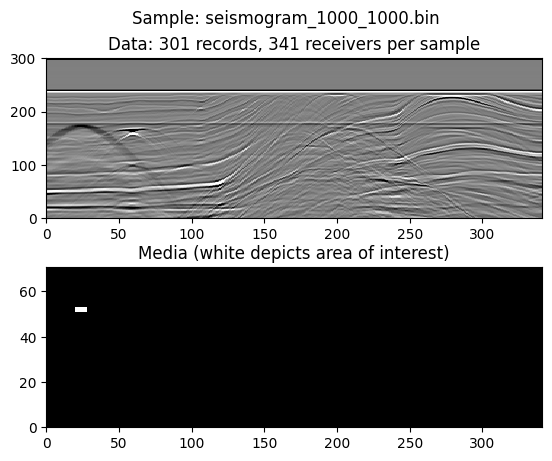

In [ ]:
# read signal
signal = np.ndarray(shape=(NUMBER_OF_SAMPLE, NUMBER_OF_RECEIVERS * 2), dtype=np.float64)
with open(os.path.join("seismogram_1000_1000.bin"), 'rb') as fd:
    for i in range(NUMBER_OF_SAMPLE):
        ts = struct.unpack('d', fd.read(8))
        signal[i, :] = np.frombuffer(fd.read(8 * NUMBER_OF_RECEIVERS * 2), dtype=np.float64)

# we are interested in vy only
signal_vy = signal[:,1::2]
signal_vx = signal[:,0::2]

print("Media shape", media.shape)
print("Signal shape", signal_vy.shape)

# viz everything (invert OY for this)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.pcolormesh(signal_vy[::-1,:], cmap=cm.gray, vmin=-1e-5, vmax=1e-5)
ax1.set_title(f'Data: {NUMBER_OF_SAMPLE} records, {NUMBER_OF_RECEIVERS} receivers per sample')
ax2.pcolormesh(media[::-1,:], cmap=cm.gray)
ax2.set_title(f'Media (white depicts area of interest)')
fig.suptitle(f'Sample: {file_name}')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

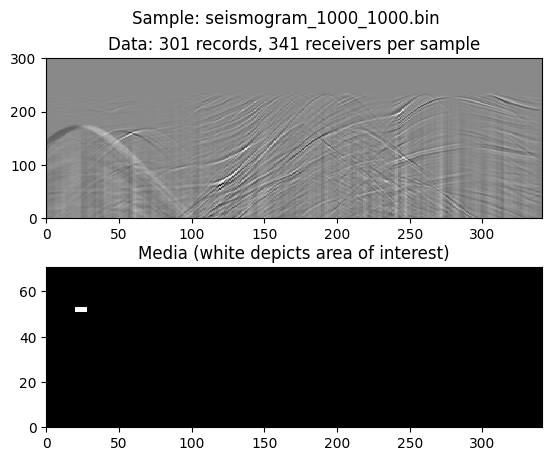

In [ ]:
# viz everything (invert OY for this)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.pcolormesh(signal_vx[::-1,:], cmap=cm.gray, vmin=-7e-9, vmax=6e-9)
ax1.set_title(f'Data: {NUMBER_OF_SAMPLE} records, {NUMBER_OF_RECEIVERS} receivers per sample')
ax2.pcolormesh(media[::-1,:], cmap=cm.gray)
ax2.set_title(f'Media (white depicts area of interest)')
fig.suptitle(f'Sample: {file_name}')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

Media shape (71, 341)
Signal shape (301, 341)


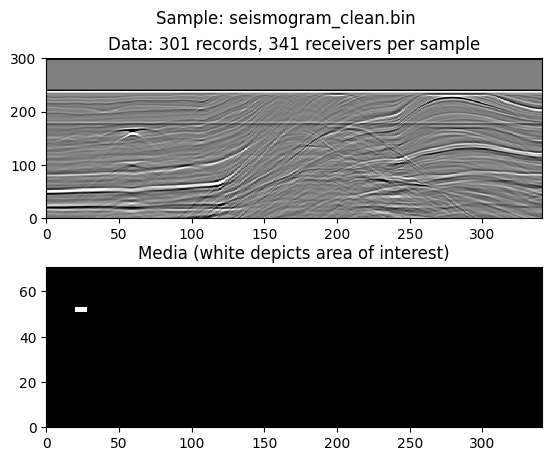

In [ ]:
file_name = 'seismogram_clean.bin'

# read signal
signal = np.ndarray(shape=(NUMBER_OF_SAMPLE, NUMBER_OF_RECEIVERS * 2), dtype=np.float64)
with open(os.path.join('seismogram_clean.bin'), 'rb') as fd:
    for i in range(NUMBER_OF_SAMPLE):
        ts = struct.unpack('d', fd.read(8))
        signal[i, :] = np.frombuffer(fd.read(8 * NUMBER_OF_RECEIVERS * 2), dtype=np.float64)

# we are interested in vy only
signal_vy_0 = signal[:,1::2]
signal_vx_0 = signal[:,0::2]

max_y = signal_vy_0.max()
max_x = signal_vx_0.max()
min_y = signal_vy_0.min()
min_x = signal_vx_0.min()

print("Media shape", media.shape)
print("Signal shape", signal_vy.shape)

# viz everything (invert OY for this)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.pcolormesh(signal_vy_0[::-1,:], cmap=cm.gray, vmin=-1e-5, vmax=1e-5)
ax1.set_title(f'Data: {NUMBER_OF_SAMPLE} records, {NUMBER_OF_RECEIVERS} receivers per sample')
ax2.pcolormesh(media[::-1,:], cmap=cm.gray)
ax2.set_title(f'Media (white depicts area of interest)')
fig.suptitle(f'Sample: {file_name}')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

In [ ]:
max_x

6.785909453999561e-09

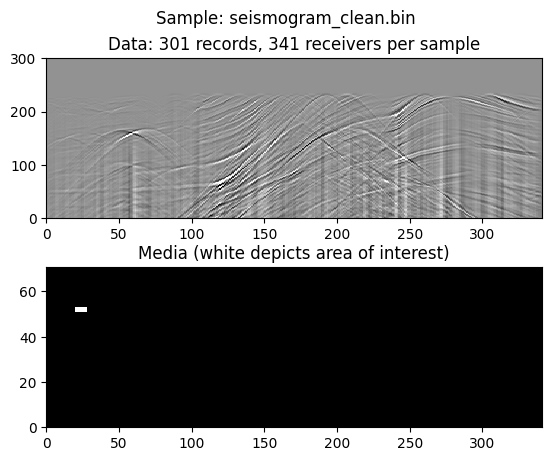

In [ ]:
# viz everything (invert OY for this)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.pcolormesh(signal_vx_0[::-1,:], cmap=cm.gray, vmin=-4e-9, vmax=3e-9)
ax1.set_title(f'Data: {NUMBER_OF_SAMPLE} records, {NUMBER_OF_RECEIVERS} receivers per sample')
ax2.pcolormesh(media[::-1,:], cmap=cm.gray)
ax2.set_title(f'Media (white depicts area of interest)')
fig.suptitle(f'Sample: {file_name}')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

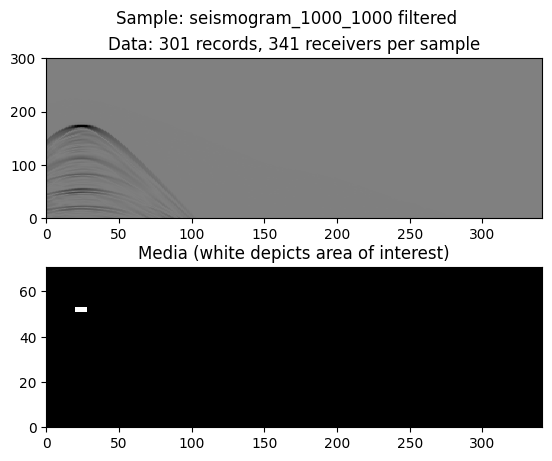

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.pcolormesh(-abs(signal_vy[::-1,:]-signal_vy_0[::-1,:]), cmap=cm.gray, vmin=-1e-5, vmax=1e-5)
ax1.set_title(f'Data: {NUMBER_OF_SAMPLE} records, {NUMBER_OF_RECEIVERS} receivers per sample')
ax2.pcolormesh(media[::-1,:], cmap=cm.gray)
ax2.set_title(f'Media (white depicts area of interest)')
fig.suptitle(f'Sample: seismogram_1000_1000 filtered')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

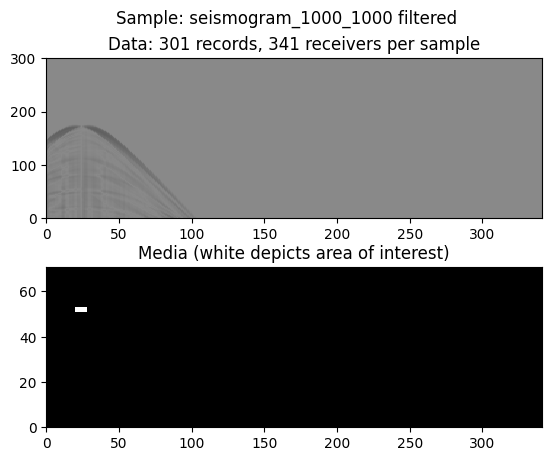

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.pcolormesh(-abs(signal_vx[::-1,:]-signal_vx_0[::-1,:]), cmap=cm.gray, vmin=-7e-9, vmax=6e-9)
ax1.set_title(f'Data: {NUMBER_OF_SAMPLE} records, {NUMBER_OF_RECEIVERS} receivers per sample')
ax2.pcolormesh(media[::-1,:], cmap=cm.gray)
ax2.set_title(f'Media (white depicts area of interest)')
fig.suptitle(f'Sample: seismogram_1000_1000 filtered')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

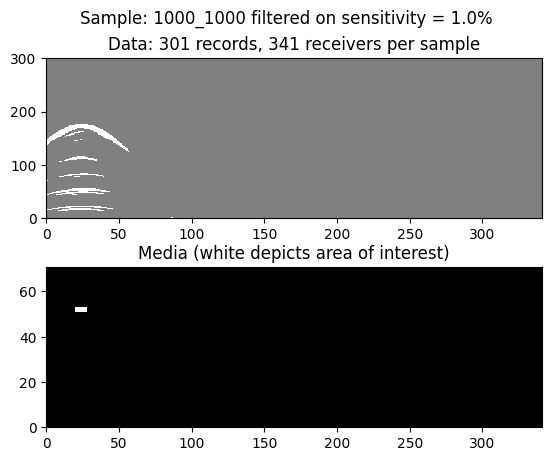

In [ ]:
proc_y = 0.01
res_y = (abs(signal_vy[::-1,:]-signal_vy_0[::-1,:])> max_y*proc_y)*max_y

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.pcolormesh(res_y, cmap=cm.gray, vmin=-1e-5, vmax=1e-5)
ax1.set_title(f'Data: {NUMBER_OF_SAMPLE} records, {NUMBER_OF_RECEIVERS} receivers per sample')
ax2.pcolormesh(media[::-1,:], cmap=cm.gray)
ax2.set_title(f'Media (white depicts area of interest)')
fig.suptitle(f'Sample: 1000_1000 filtered on sensitivity = {proc_y*100}%')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

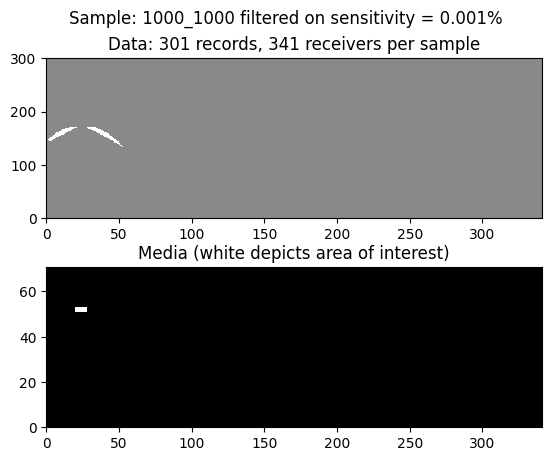

In [ ]:
proc_x = 0.00001
res_x = (abs(signal_vx[::-1,:]-signal_vx_0[::-1,:])> max_y*proc_x)*max_x

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.pcolormesh(res_x, cmap=cm.gray, vmin=-7e-9, vmax=6e-9)
ax1.set_title(f'Data: {NUMBER_OF_SAMPLE} records, {NUMBER_OF_RECEIVERS} receivers per sample')
ax2.pcolormesh(media[::-1,:], cmap=cm.gray)
ax2.set_title(f'Media (white depicts area of interest)')
fig.suptitle(f'Sample: 1000_1000 filtered on sensitivity = {proc_x*100}%')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

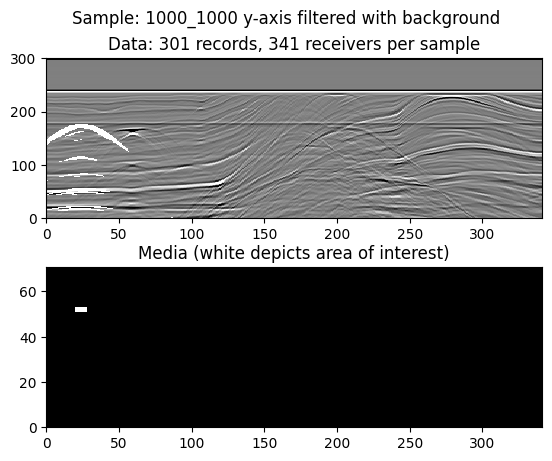

In [ ]:
res_y_1 = res_y + signal_vy_0[::-1,:]

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.pcolormesh(res_y_1, cmap=cm.gray, vmin=-1e-5, vmax=1e-5)
ax1.set_title(f'Data: {NUMBER_OF_SAMPLE} records, {NUMBER_OF_RECEIVERS} receivers per sample')
ax2.pcolormesh(media[::-1,:], cmap=cm.gray)
ax2.set_title(f'Media (white depicts area of interest)')
fig.suptitle(f'Sample: 1000_1000 y-axis filtered with background')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

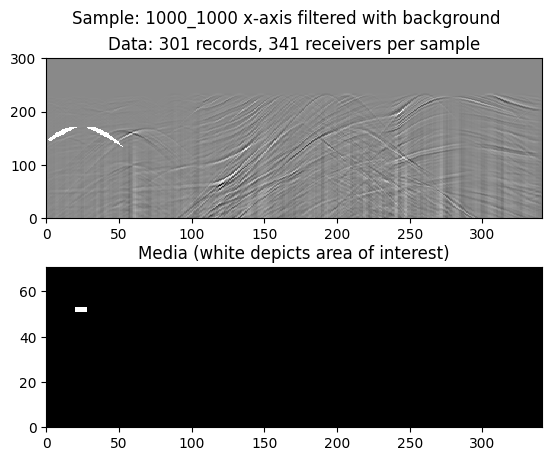

In [ ]:
res_x_1 = res_x + signal_vx_0[::-1,:]

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.pcolormesh(res_x_1, cmap=cm.gray, vmin=-7e-9, vmax=6e-9)
ax1.set_title(f'Data: {NUMBER_OF_SAMPLE} records, {NUMBER_OF_RECEIVERS} receivers per sample')
ax2.pcolormesh(media[::-1,:], cmap=cm.gray)
ax2.set_title(f'Media (white depicts area of interest)')
fig.suptitle(f'Sample: 1000_1000 x-axis filtered with background')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

In [ ]:
path = %pwd

fds = sorted(os.listdir(path))

AREA_WIDTH  = 17000
AREA_HIGHT = 3500

BLOCK_WIDTH  = 400
BLOCK_HEIGHT = 100

NUMBER_OF_SAMPLE = 301
NUMBER_OF_RECEIVERS = 341

proc_y = 0.01
proc_x = 0.00001
visib_y = np.zeros(shape=(int(AREA_HIGHT / space_step) + 1, int(AREA_WIDTH / space_step) + 1), dtype=np.float64)
visib_x = np.zeros(shape=(int(AREA_HIGHT / space_step) + 1, int(AREA_WIDTH / space_step) + 1), dtype=np.float64)

In [ ]:
for bin in fds:
  if re.match(r'seismogram_\d+_\d+(.bin)\b', bin):
    file_name = bin
    #print(bin)

    # read media
    # overall sizes are fixed 
    space_step = AREA_WIDTH / (NUMBER_OF_RECEIVERS - 1)
    media = np.zeros(shape=(int(AREA_HIGHT / space_step) + 1, int(AREA_WIDTH / space_step) + 1), dtype=np.float64)

    # x0 and y0 of the inclusion should be parsed from file name
    # inclusion sizes are fixed
    _, x0, y0 = file_name.split('.')[0].split('_')
    left_x = int(int(x0) / space_step)
    right_x = int((int(x0) + BLOCK_WIDTH) / space_step)
    bottom_y = int(int(y0) / space_step)
    top_y = int((int(y0) - BLOCK_HEIGHT) / space_step)

    media[top_y:bottom_y, left_x:right_x] = 1

    # read signal
    signal = np.ndarray(shape=(NUMBER_OF_SAMPLE, NUMBER_OF_RECEIVERS * 2), dtype=np.float64)
    with open(os.path.join(bin), 'rb') as fd:
        for i in range(NUMBER_OF_SAMPLE):
            ts = struct.unpack('d', fd.read(8))
            signal[i, :] = np.frombuffer(fd.read(8 * NUMBER_OF_RECEIVERS * 2), dtype=np.float64)

    # we are interested in vy only
    signal_vy = signal[:,1::2]
    signal_vx = signal[:,0::2]

    vy_res_only = (abs(signal_vy[::-1,:]-signal_vy_0[::-1,:])> max_y*proc_y)*max_y 
    vx_res_only = (abs(signal_vx[::-1,:]-signal_vx_0[::-1,:])> max_y*proc_x)*max_y

    visib_y[top_y:bottom_y, left_x:right_x] = np.count_nonzero(vy_res_only)/len(vy_res_only)
    visib_x[top_y:bottom_y, left_x:right_x] = np.count_nonzero(vx_res_only)/len(vx_res_only)

    print("Media shape", media.shape)
    print("Signal shape", signal_vy.shape)

    # viz everything (invert OY for this)
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
    ax1.pcolormesh(vy_res_only + signal_vy_0[::-1,:], cmap=cm.gray, vmin=-1e-5, vmax=1e-5)
    #ax1.pcolormesh(signal_vy[::-1,:], cmap=cm.gray, vmin=-1e-5, vmax=1e-5)
    ax1.set_title(f'Data: {NUMBER_OF_SAMPLE} records, {NUMBER_OF_RECEIVERS} receivers per sample')
    ax2.pcolormesh(media[::-1,:], cmap=cm.gray)
    ax2.set_title(f'Media (white depicts area of interest)')
    fig.suptitle(f'Sample: {file_name}')
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

In [ ]:
def visible_signal(proc_x, proc_y):
  path = %pwd

  fds = sorted(os.listdir(path))

  AREA_WIDTH  = 17000
  AREA_HIGHT = 3500

  BLOCK_WIDTH  = 400
  BLOCK_HEIGHT = 100

  NUMBER_OF_SAMPLE = 301
  NUMBER_OF_RECEIVERS = 341

  visib_y = np.zeros(shape=(int(AREA_HIGHT / space_step) + 1, int(AREA_WIDTH / space_step) + 1), dtype=np.float64)
  visib_x = np.zeros(shape=(int(AREA_HIGHT / space_step) + 1, int(AREA_WIDTH / space_step) + 1), dtype=np.float64)


  for bin in fds:
  if re.match(r'seismogram_\d+_\d+(.bin)\b', bin):
    file_name = bin
    #print(bin)

    # read media
    # overall sizes are fixed 
    space_step = AREA_WIDTH / (NUMBER_OF_RECEIVERS - 1)
    media = np.zeros(shape=(int(AREA_HIGHT / space_step) + 1, int(AREA_WIDTH / space_step) + 1), dtype=np.float64)

    # x0 and y0 of the inclusion should be parsed from file name
    # inclusion sizes are fixed
    _, x0, y0 = file_name.split('.')[0].split('_')
    left_x = int(int(x0) / space_step)
    right_x = int((int(x0) + BLOCK_WIDTH) / space_step)
    bottom_y = int(int(y0) / space_step)
    top_y = int((int(y0) - BLOCK_HEIGHT) / space_step)

    media[top_y:bottom_y, left_x:right_x] = 1

    # read signal
    signal = np.ndarray(shape=(NUMBER_OF_SAMPLE, NUMBER_OF_RECEIVERS * 2), dtype=np.float64)
    with open(os.path.join(bin), 'rb') as fd:
        for i in range(NUMBER_OF_SAMPLE):
            ts = struct.unpack('d', fd.read(8))
            signal[i, :] = np.frombuffer(fd.read(8 * NUMBER_OF_RECEIVERS * 2), dtype=np.float64)

    # we are interested in vy only
    signal_vy = signal[:,1::2]
    signal_vx = signal[:,0::2]

    vy_res_only = (abs(signal_vy[::-1,:]-signal_vy_0[::-1,:])> max_y*proc_y)*max_y 
    vx_res_only = (abs(signal_vx[::-1,:]-signal_vx_0[::-1,:])> max_y*proc_x)*max_y

    visib_y[top_y:bottom_y, left_x:right_x] = np.count_nonzero(vy_res_only)/len(vy_res_only)
    visib_x[top_y:bottom_y, left_x:right_x] = np.count_nonzero(vx_res_only)/len(vx_res_only)

    print("Media shape", media.shape)
    print("Signal shape", signal_vy.shape)

    # viz everything (invert OY for this)
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
    ax1.pcolormesh(vy_res_only + signal_vy_0[::-1,:], cmap=cm.gray, vmin=-1e-5, vmax=1e-5)
    #ax1.pcolormesh(signal_vy[::-1,:], cmap=cm.gray, vmin=-1e-5, vmax=1e-5)
    ax1.set_title(f'Data: {NUMBER_OF_SAMPLE} records, {NUMBER_OF_RECEIVERS} receivers per sample')
    ax2.pcolormesh(media[::-1,:], cmap=cm.gray)
    ax2.set_title(f'Media (white depicts area of interest)')
    fig.suptitle(f'Sample: {file_name}')
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

visible signal (71, 341)


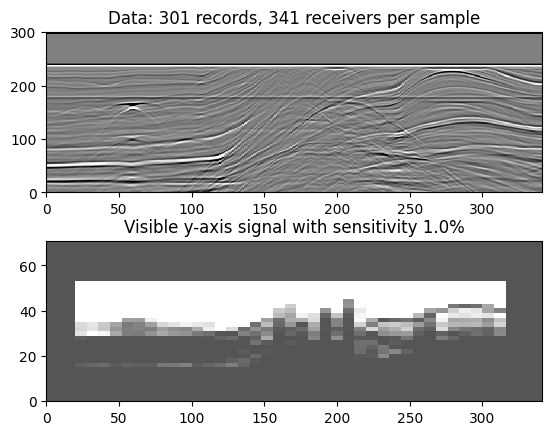

In [ ]:
    print("visible signal", visib_y.shape)

    # viz everything (invert OY for this)
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
    ax1.pcolormesh(signal_vy_0[::-1,:], cmap=cm.gray, vmin=-1e-5, vmax=1e-5)
    #ax1.pcolormesh(signal_vy[::-1,:], cmap=cm.gray, vmin=-1e-5, vmax=1e-5)
    ax1.set_title(f'Data: {NUMBER_OF_SAMPLE} records, {NUMBER_OF_RECEIVERS} receivers per sample')
    ax2.pcolormesh(visib_y[::-1,:], cmap=cm.gray, vmin= -0.5, vmax=1)
    ax2.set_title(f'Visible y-axis signal with sensitivity {proc_y*100}%')
    
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

visible signal (71, 341)


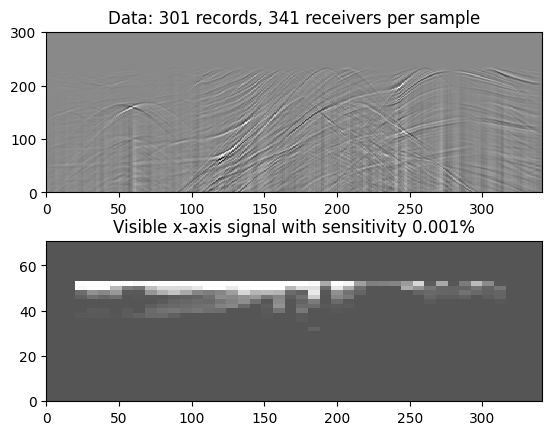

In [ ]:
    print("visible signal", visib_x.shape)

    # viz everything (invert OY for this)
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
    ax1.pcolormesh(signal_vx_0[::-1,:], cmap=cm.gray, vmin=-7e-9, vmax=6e-9)
    #ax1.pcolormesh(signal_vy[::-1,:], cmap=cm.gray, vmin=-1e-5, vmax=1e-5)
    ax1.set_title(f'Data: {NUMBER_OF_SAMPLE} records, {NUMBER_OF_RECEIVERS} receivers per sample')
    ax2.pcolormesh(visib_x[::-1,:], cmap=cm.gray, vmin= -0.5, vmax=1)
    ax2.set_title(f'Visible x-axis signal with sensitivity {proc_x*100}%')

    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()